# Project Presentation - Justin Brand
## [PyLops](https://github.com/PyLops/pylops)

PyLops is a Python package that deals with linear operators and matrix calculations. While many linear operators can be used through the libraries numpy and scipy, PyLops can replicate similar operations without the need to create large or dense intermediary matrices. This can save time and space especially when dealing with larger data sets.

# What is PyLops used for?
PyLops deals primarily with matrices and is most effective for cases where large matrices are utilized. Therefore, some of the areas that benefit from this library are signal processing, image processing, and remote sensing.

# What can PyLops do?
The creators included various applications. Some of the operations are below:
* derivative calculation
* matrix multiplication
* regressions
* interpolation

Since there are so many possible areas in this library to explore, I decided to take a closer look at regression. The code below is from one of PyLops' examples for regression.

IRLS converged at 4 iterations...


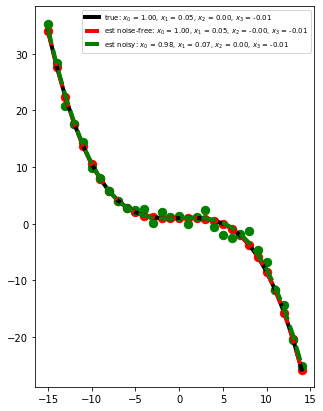

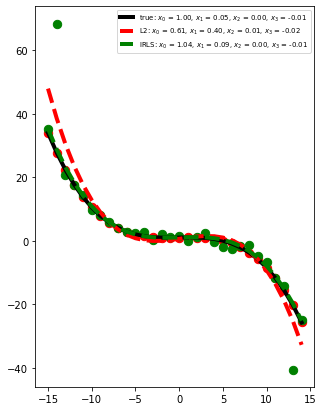

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import pylops

plt.close("all")
np.random.seed(10)

###############################################################################
# Define the input parameters: number of samples along the t-axis (``N``),
# order (``order``), regression coefficients (``x``), and standard deviation
# of noise to be added to data (``sigma``).
N = 30
order = 3
x = np.array([1.0, 0.05, 0.0, -0.01])
sigma = 1

###############################################################################
# Let's create the time axis and initialize the
# :py:class:`pylops.Regression` operator
t = np.arange(N, dtype="float64") - N // 2
PRop = pylops.Regression(t, order=order, dtype="float64")
y = PRop * x
yn = y + np.random.normal(0, sigma, N)

###############################################################################
# We are now ready to solve our problem. As we are using an operator from the
# :py:class:`pylops.LinearOperator` family, we can simply use ``/``,
# which in this case will solve the system by means of an iterative solver
# (i.e., :py:func:`scipy.sparse.linalg.lsqr`).
xest = PRop / y
xnest = PRop / yn

###############################################################################
# Let's plot the best fitting curve for the case of noise free and noisy data
plt.figure(figsize=(5, 7))
plt.plot(
    t,
    PRop * x,
    "k",
    lw=4,
    label=r"true: $x_0$ = %.2f, $x_1$ = %.2f, "
    r"$x_2$ = %.2f, $x_3$ = %.2f" % (x[0], x[1], x[2], x[3]),
)
plt.plot(
    t,
    PRop * xest,
    "--r",
    lw=4,
    label="est noise-free: $x_0$ = %.2f, $x_1$ = %.2f, "
    r"$x_2$ = %.2f, $x_3$ = %.2f" % (xest[0], xest[1], xest[2], xest[3]),
)
plt.plot(
    t,
    PRop * xnest,
    "--g",
    lw=4,
    label="est noisy: $x_0$ = %.2f, $x_1$ = %.2f, "
    r"$x_2$ = %.2f, $x_3$ = %.2f" % (xnest[0], xnest[1], xnest[2], xnest[3]),
)
plt.scatter(t, y, c="r", s=70)
plt.scatter(t, yn, c="g", s=70)
plt.legend(fontsize="x-small")

###############################################################################
# We consider now the case where some of the observations have large errors.
# Such elements are generally referred to as *outliers* and can affect the
# quality of the least-squares solution if not treated with care. In this
# example we will see how using a L1 solver such as
# :py:func:`pylops.optimization.sparsity.IRLS` can drammatically improve the
# quality of the estimation of intercept and gradient.

# Add outliers
yn[1] += 40
yn[N - 2] -= 20

# IRLS
nouter = 20
epsR = 1e-2
epsI = 0
tolIRLS = 1e-2

xnest = PRop / yn
xirls, nouter, xirls_hist, rw_hist = pylops.optimization.sparsity.IRLS(
    PRop,
    yn,
    nouter,
    threshR=False,
    epsR=epsR,
    epsI=epsI,
    tolIRLS=tolIRLS,
    returnhistory=True,
)
print(f"IRLS converged at {nouter} iterations...")

plt.figure(figsize=(5, 7))
plt.plot(
    t,
    PRop * x,
    "k",
    lw=4,
    label=r"true: $x_0$ = %.2f, $x_1$ = %.2f, "
    r"$x_2$ = %.2f, $x_3$ = %.2f" % (x[0], x[1], x[2], x[3]),
)
plt.plot(
    t,
    PRop * xnest,
    "--r",
    lw=4,
    label=r"L2: $x_0$ = %.2f, $x_1$ = %.2f, "
    r"$x_2$ = %.2f, $x_3$ = %.2f" % (xnest[0], xnest[1], xnest[2], xnest[3]),
)
plt.plot(
    t,
    PRop * xirls,
    "--g",
    lw=4,
    label=r"IRLS: $x_0$ = %.2f, $x_1$ = %.2f, "
    r"$x_2$ = %.2f, $x_3$ = %.2f" % (xirls[0], xirls[1], xirls[2], xirls[3]),
)
plt.scatter(t, y, c="r", s=70)
plt.scatter(t, yn, c="g", s=70)
plt.legend(fontsize="x-small")

# Question
I am curious about how the comitters decided which functions and properties to add to their package, especially because the package is broad in scope containing simple transpose functions to in depth convulution.
# Future Project
I am also curious about how each function compares in both time and accuracy to other similar and more well known libraries. To test this, we could test a couple 